In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Xdf = pd.read_csv('Clear_data/All data no holes no duplicates.csv',header=0)
Xdf.describe()

Testo 1 160 IAQ ppm  Testo 1 160 IAQ °C  Testo 1 160 IAQ %RF  \
count         17540.000000        17540.000000         17540.000000   
mean            777.576283           22.604304            42.136471   
std             315.817548            2.209737             5.421851   
min             302.000000           17.800000            25.800000   
25%             543.000000           20.700000            38.400000   
50%             741.000000           22.400000            41.800000   
75%             932.000000           24.500000            45.200000   
max            2264.000000           28.500000            67.000000   

       Testo 3 160 IAQ ppm  Testo 3 160 IAQ °C  Testo 3 160 IAQ%RH  \
count         17540.000000        17540.000000        17540.000000   
mean            829.331699           20.375046           48.633415   
std             348.652562            2.176181            7.318031   
min             303.000000           10.900000           28.000000   
25%             569.000000           18.800000           43.000000   
50%             769.000000           20.400000           48.500000   
75%             995.000000           22.100000           53.900000   
max            5294.000000           26.100000           76.100000   

       Testo 2 160 IAQ ppm  Testo 2 160 IAQ °C  Testo 2 160 IAQ %RH  
count         17540.000000        17540.000000         17540.000000  
mean            915.743900           19.493620            52.229795  
std             370.167471            1.234432             4.910022  
min             343.000000           15.200000            31.300000  
25%             626.000000           18.700000            49.200000  
50%             895.000000           19.600000            52.400000  
75%            1117.000000           20.300000            55.500000  
max            2576.000000           23.500000            67.300000

In [4]:
Gdf = Xdf
Gdf = Gdf.dropna().reset_index().drop(columns='index')
Gdf.describe()

Testo 1 160 IAQ ppm  Testo 1 160 IAQ °C  Testo 1 160 IAQ %RF  \
count         17540.000000        17540.000000         17540.000000   
mean            777.576283           22.604304            42.136471   
std             315.817548            2.209737             5.421851   
min             302.000000           17.800000            25.800000   
25%             543.000000           20.700000            38.400000   
50%             741.000000           22.400000            41.800000   
75%             932.000000           24.500000            45.200000   
max            2264.000000           28.500000            67.000000   

       Testo 3 160 IAQ ppm  Testo 3 160 IAQ °C  Testo 3 160 IAQ%RH  \
count         17540.000000        17540.000000        17540.000000   
mean            829.331699           20.375046           48.633415   
std             348.652562            2.176181            7.318031   
min             303.000000           10.900000           28.000000   
25%             569.000000           18.800000           43.000000   
50%             769.000000           20.400000           48.500000   
75%             995.000000           22.100000           53.900000   
max            5294.000000           26.100000           76.100000   

       Testo 2 160 IAQ ppm  Testo 2 160 IAQ °C  Testo 2 160 IAQ %RH  
count         17540.000000        17540.000000         17540.000000  
mean            915.743900           19.493620            52.229795  
std             370.167471            1.234432             4.910022  
min             343.000000           15.200000            31.300000  
25%             626.000000           18.700000            49.200000  
50%             895.000000           19.600000            52.400000  
75%            1117.000000           20.300000            55.500000  
max            2576.000000           23.500000            67.300000

In [5]:
def calculate_merge_gradient( DataF : pd.DataFrame,column_name : str):
    y = np.array(DataF[column_name])
    dx = 1
    dy_dx = np.gradient(y, dx)
    df = pd.DataFrame(DataF['Datetime'])
    df['Gradient '+column_name] = dy_dx
    df['Datetime'] = DataF['Datetime']
    merged_df = pd.merge(DataF,df,on='Datetime',how='outer')
    return merged_df

In [6]:
names_list = np.array(Gdf.columns[1:].values.tolist())
selected_elements = [names_list[i] for i in [0, 3, 6]]
selected_elements

['Testo 1 160 IAQ ppm', 'Testo 3 160 IAQ ppm', 'Testo 2 160 IAQ ppm']

In [7]:
for name in selected_elements:
    Gdf = calculate_merge_gradient(Gdf,name)

In [10]:
Fdf = Gdf[[ 'Datetime',
            'Testo 1 160 IAQ ppm',	'Gradient Testo 1 160 IAQ ppm','Testo 1 160 IAQ °C',	'Testo 1 160 IAQ %RF',
            'Testo 2 160 IAQ ppm',  'Gradient Testo 2 160 IAQ ppm','Testo 2 160 IAQ °C',	'Testo 2 160 IAQ %RH',
            'Testo 3 160 IAQ ppm',  'Gradient Testo 3 160 IAQ ppm','Testo 3 160 IAQ °C',    'Testo 3 160 IAQ%RH',]]

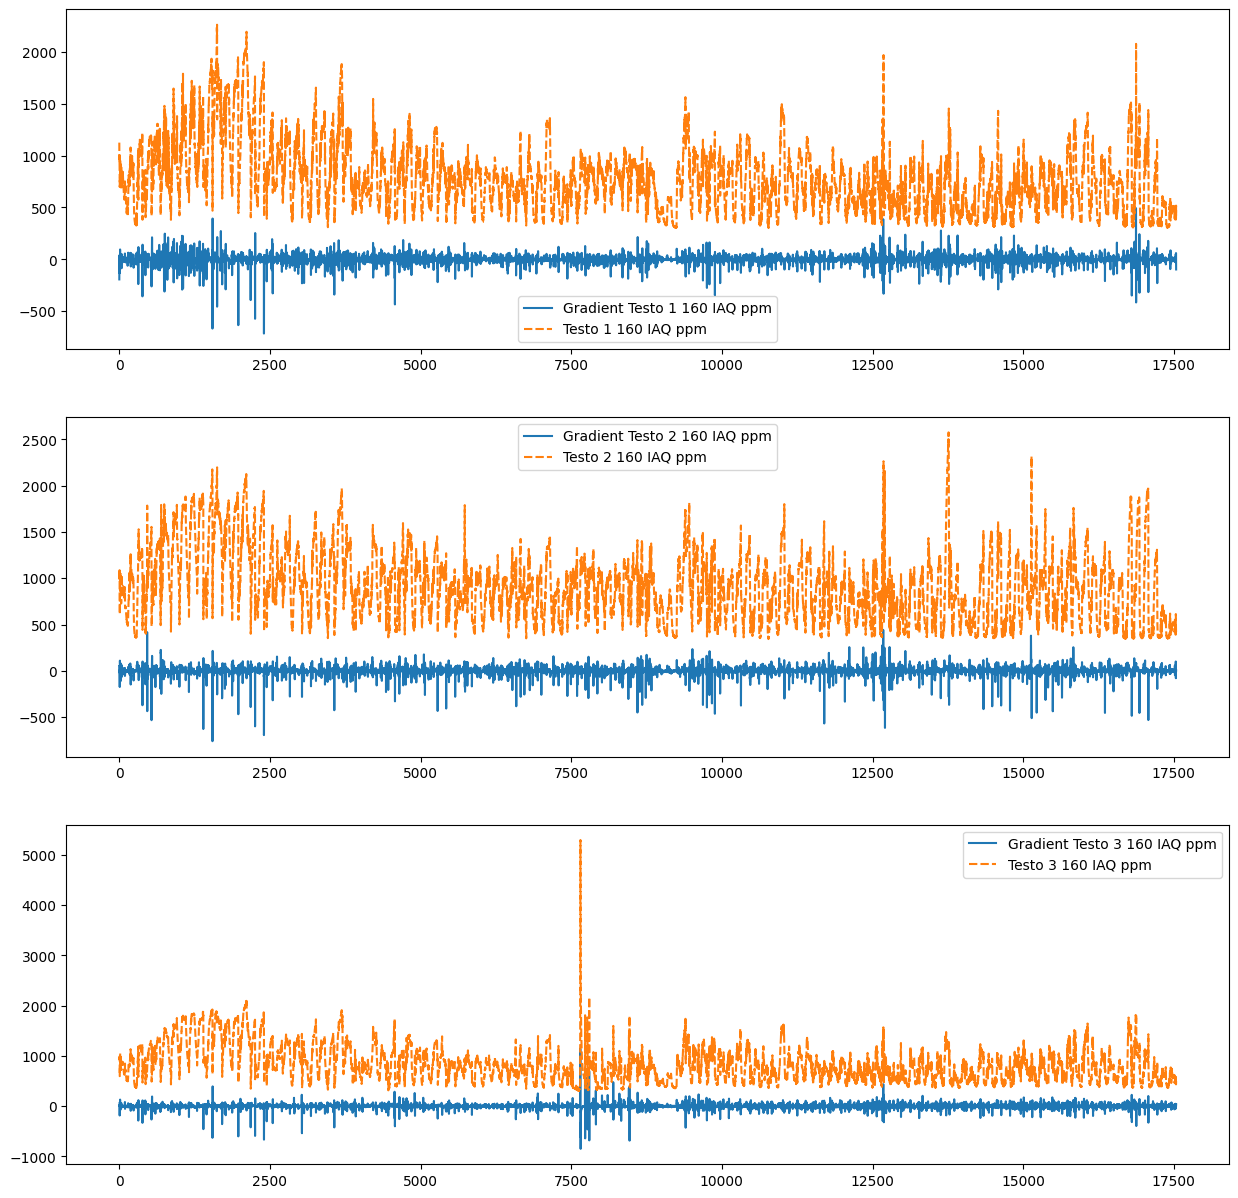

In [11]:
plt.close()
plt.figure(figsize=(15,15))

plot_number = 3

#plot 1:
plt.subplot(plot_number, 1, 1)
sns.lineplot(Fdf[['Gradient Testo 1 160 IAQ ppm','Testo 1 160 IAQ ppm']])

#plot 2:
plt.subplot(plot_number, 1, 2)
sns.lineplot(Fdf[['Gradient Testo 2 160 IAQ ppm','Testo 2 160 IAQ ppm']])

#plot 3:
plt.subplot(plot_number, 1, 3)
sns.lineplot(Fdf[['Gradient Testo 3 160 IAQ ppm','Testo 3 160 IAQ ppm']])

plt.show()

In [12]:
Fdf.to_csv('Clear_data/Organized_Data_FH.csv', index=False)
Fdf.to_excel('Clear_data/Organized_Data_FH.xlsx', index=False)